In [1]:
import pathlib
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
import humanize
import numpy as np

from experimental.deeplearning.fish import train_discriminator
from experimental.deeplearning.fish.proto import fish_pb2
from lib.labm8 import viz

/home/cec/phd/bazel-bin/experimental/deeplearning/fish/notebooks.runfiles/pypi__h5py_2_7_1/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
DATASET_SUFFIXES = [
    '',
    '_all',
    '_with_bf',
    '_balanced',
    '_balanced_with_bf',
]
sequence_length = 1024

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6444: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


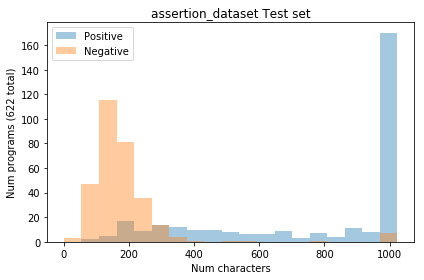

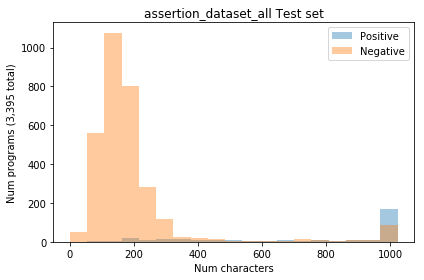

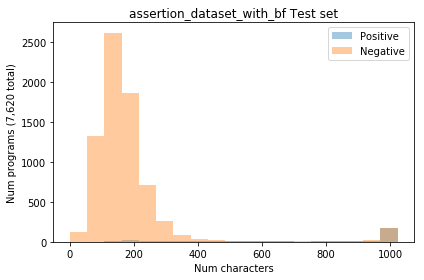

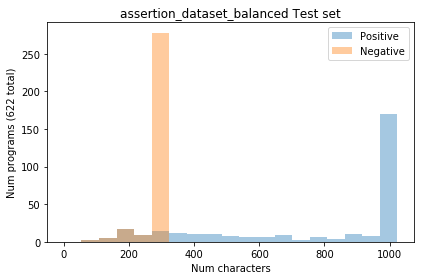

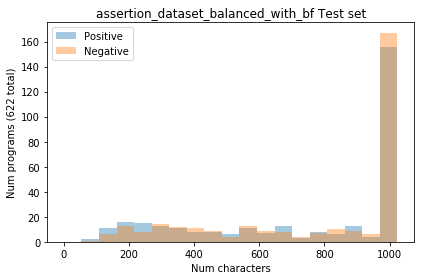

In [3]:
for suffix in DATASET_SUFFIXES:
    dataset_root = pathlib.Path(f'~/data/experimental/deeplearning/fish/assertion_dataset{suffix}').expanduser()
    if (dataset_root / 'testing').is_dir():
        testing_protos = train_discriminator.LoadPositiveNegativeProtos(dataset_root / 'testing')
        positive_lengths = np.array([min(len(p.src), sequence_length) for p in testing_protos.positive])
        negative_lengths = np.array([min(len(p.src), sequence_length) for p in testing_protos.negative])
    else:
        positive_lengths = np.array([0])
        negative_lengths = np.array([0])
    sns.distplot(positive_lengths, bins=np.linspace(0, sequence_length, 20), kde=False, label='Positive')
    sns.distplot(negative_lengths, bins=np.linspace(0, sequence_length, 20), kde=False, label='Negative')
    plt.xlabel('Num characters')
    n = humanize.intcomma(len(positive_lengths) + len(negative_lengths))
    plt.ylabel(f'Num programs ({n} total)')
    plt.title(f'assertion_dataset{suffix} Test set')
    plt.legend()
    viz.finalise()